# Dog Breed Prediction 

### Exploratory Data Analysis

In [32]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot


images_dir = "./data/images/"

In [33]:
def get_image_info(image_file):
    im = Image.open(f'{image_file}')
    print("Image Format: ", im.format)
    print("Image Mode: ", im.mode)
    print("Image Size: ", im.size)
    data = image.imread(f'{image_file}')

    print("datatype: ", data.dtype)
    print("shape: ", data.shape)

    pyplot.imshow(data)
    pyplot.show()

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (289, 450)
datatype:  uint8
shape:  (450, 289, 3)


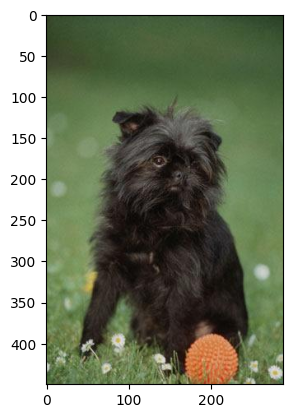

In [34]:
get_image_info(f'{images_dir}affenpinscher-7.jpg')

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (500, 375)
datatype:  uint8
shape:  (375, 500, 3)


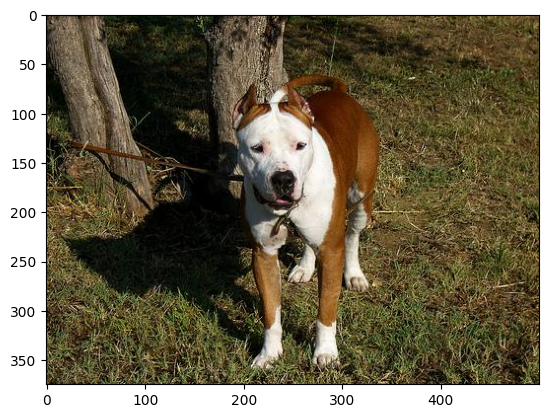

In [35]:
get_image_info(f'{images_dir}American Staffordshire terrier-1.jpg')

Image Format:  JPEG
Image Mode:  RGB
Image Size:  (500, 375)
datatype:  uint8
shape:  (375, 500, 3)


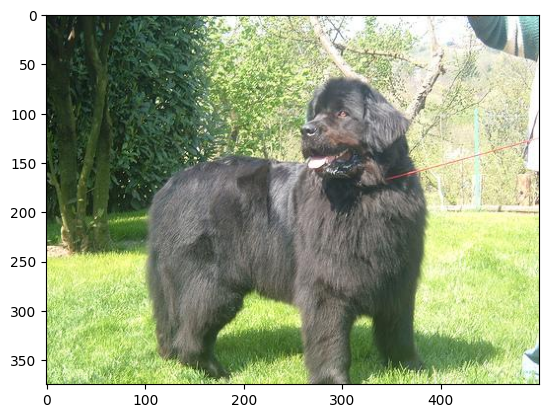

In [36]:
get_image_info(f'{images_dir}Newfoundland-148.jpg')

In [37]:
import os
import pandas as pd

def gather_image_info(directory):
    image_data = []

    # Iterate over each file in the directory
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            filepath = os.path.join(directory, filename)
            try:
                with Image.open(filepath) as img:
                    info = {
                        'Filename': filename,
                        'File Type': img.format,
                        'Shape': img.size,
                        'Image Mode': img.mode
                    }
                    image_data.append(info)
            except IOError:
                print(f"Cannot open {filename}")
                
    df = pd.DataFrame(image_data)
    return df


image_info_df = gather_image_info(images_dir)


In [38]:
print(image_info_df.head())

                 Filename File Type       Shape Image Mode
0     Walker hound-62.jpg      JPEG  (200, 200)        RGB
1  Norfolk terrier-71.jpg      JPEG  (430, 380)        RGB
2     Walker hound-68.jpg      JPEG  (209, 209)        RGB
3  German shepherd-66.jpg      JPEG  (360, 333)        RGB
4            chow-140.jpg      JPEG  (500, 333)        RGB


In [39]:
image_info_df.describe()

,Filename,File Type,Shape,Image Mode
count,20580,20580,20580,20580
unique,20580,2,4542,2
top,Walker hound-62.jpg,JPEG,"(500, 375)",RGB
freq,1,20579,5301,20579


In [40]:
not_jpeg_images = image_info_df[image_info_df['File Type'] != 'JPEG']
print(not_jpeg_images)

                      Filename File Type       Shape Image Mode
9624  Shetland sheepdog-23.jpg       PNG  (213, 189)       RGBA


Image Format:  PNG
Image Mode:  RGBA
Image Size:  (213, 189)
datatype:  float32
shape:  (189, 213, 4)


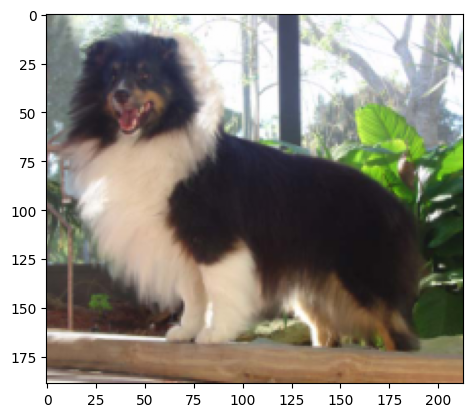

In [41]:
get_image_info(f'{images_dir}Shetland sheepdog-23.jpg')

Note that from what is shown above, the image "Shetland sheepdog-23.jpg" is not like the rest of the images as it has 4 color channels and is a PNG image. As this is the only image like this, we will remove the image from the data set. This is curious because the image ends with the '.jpg' file type, but it has 4 color channels. 

Other than that everything looks good. ALl images seem to be JPEG images with 3 color channels, RGB. One issue is that the images are all of different sizes, so we will have to resize all of the images.

## Preprocessing and Processing Data

In [42]:
# We will be resizing the images to (224, 224, 3)
img_width, img_height = 128, 128 # 224, 224 
input_shape = (img_height, img_height, 3)
channels = 3
image_arr_size= img_width * img_height * channels

In [43]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(directory, exclude_file='Shetland sheepdog-23.jpg'):
    images = []
    labels = []
    
    for filename in os.listdir(directory):
        if filename.lower().endswith('.jpg') and filename != exclude_file:
            file_path = os.path.join(directory, filename)
            
            with Image.open(file_path) as img:
                img = img.convert('RGB')
                img = img.resize((img_width, img_height))
                # img = img.resize((224, 224))

                images.append(np.array(img))
            
                label = filename.split('-')[0]
                labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

images, labels = load_images_and_labels(images_dir)

In [44]:
print("Loaded", images.shape[0], "images.")
print("Images shape:", images.shape[1:])
print("Labels:", labels)
print(f"There are {len(np.unique(labels))} unique labels")

Loaded 20579 images.
Images shape: (128, 128, 3)
Labels: ['Walker hound' 'Norfolk terrier' 'Walker hound' ... 'Irish setter' 'pug'
 'Pekinese']
There are 120 unique labels


In [45]:
import pandas as pd
labels_pd = pd.DataFrame(labels)
labels_pd.info()
labels_pd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20579 entries, 0 to 20578
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20579 non-null  object
dtypes: object(1)
memory usage: 160.9+ KB


,0
count,20579
unique,120
top,Maltese dog
freq,252


In [46]:
print(images[1][1][1]) # first image, on pixel x=1, y=1, gives the RGB values

[133 147 132]


Normalizing data

In [47]:
def normalize(image_array):
    data_all_resized = []
    for image in image_array:
        image_resized = np.array(image, dtype=np.float32) / 255.0
        img_array = np.array(image_resized)
        data_all_resized.append(img_array)
        
    return np.array(data_all_resized)

In [48]:
images = normalize(images)

In [61]:
print(images[1][1][1]) # images are now normalized

[0.52156866 0.5764706  0.5176471 ]


### Splitting Data for testing and training

*Note: gonna try using train_test_split because I like it, may have memory issues but we'll see*

In [62]:
labels

array(['Walker hound', 'Norfolk terrier', 'Walker hound', ...,
       'Irish setter', 'pug', 'Pekinese'], dtype='<U30')

In [83]:
from sklearn.model_selection import train_test_split

X = images
y = label_encoder.fit_transform(labels)
y_cat = to_categorical(y, 120)

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25, stratify=y, random_state=1)


# # killing these variables to save memore
# X = 0
# y_cat = 0
# images = 0
# labels = 0
# labels_pd = 0

In [82]:
y_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15434, 128, 128, 3)
(15434, 120)
(5145, 128, 128, 3)
(5145, 120)


## At this point we have:

- Loaded the data, visualized it, checked for characteristics such as image size, format, etc.
- Put the data into python data types (np.arrays) as the variables data_all and labels_all, which holds all the data.
- Rescaled the data to (224, 224, 3)
- Normalized the data
- Split the data into testing and training sets

## Model design, training and evaluation

#### Callback functions

In [123]:
# From class notes: 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, ModelCheckpoint

# # These will be specific to each model
# checkpoint = ModelCheckpoint(
#     'model.keras',
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True,
#     mode='auto',
#     save_weights_only=False,
#     period=1
# )

# csvlogger = CSVLogger(
#     filename= "training_model_csv.log",
#     separator = ",",
#     append = False
# )

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=3,
    verbose=1,
    mode='auto'
)



reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

## Artificial Nueral Network

In [68]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# image_arr_size = input_shape
image_size = input_shape
# image_size = (224, 224, 3)
image_arr_size = img_width * img_height * channels


Ann = Sequential() # initialize model

Ann.add(Flatten(input_shape=image_size)) # input layer

Ann.add(Dense(512, activation='relu', input_shape=(image_arr_size,)))
Ann.add(Dense(256, activation='relu'))
Ann.add(Dense(128, activation='relu'))
Ann.add(Dense(64, activation='relu'))

# output layer
Ann.add(Dense(120, activation='softmax')) # using softmax because its a multi-classification problemAnn.summary()

In [56]:
Ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_8 (Dense)             (None, 512)               25166336  
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 120)               7800      
                                                                 
Total params: 25346616 (96.69 MB)
Trainable params: 25

In [57]:
from tensorflow.keras.models import load_model

# # ANN will not work at all
# if os.path.isfile("./models/Ann.keras"):
#     Ann = load_model('./models/Ann.keras')

# else: # this takes like an hour to run 
#     Ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     Ann.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64, verbose=2)
#     Ann.save("./models/Ann.keras")

## Lenet-5

In [109]:
print("RUNNING LENET-5 MODEL")

RUNNING LENET-5 MODEL


In [110]:
from tensorflow.keras.layers import Flatten, Conv2D, AveragePooling2D

lenet5 = Sequential()

# Layer 1: Convolutional layer with 6 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=image_size))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 5x5, followed by average pooling
lenet5.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
lenet5.add(AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
lenet5.add(Flatten())

# Layer 3: Fully connected layer with 120 neurons
lenet5.add(Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
lenet5.add(Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 10 for MNIST)
lenet5.add(Dense(120, activation='softmax'))

In [111]:
lenet5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_570 (Conv2D)         (None, 124, 124, 6)       456       
                                                                 
 average_pooling2d_60 (Aver  (None, 62, 62, 6)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_571 (Conv2D)         (None, 58, 58, 16)        2416      
                                                                 
 average_pooling2d_61 (Aver  (None, 29, 29, 16)        0         
 agePooling2D)                                                   
                                                                 
 flatten_7 (Flatten)         (None, 13456)             0         
                                                                 
 dense_29 (Dense)            (None, 120)             

In [125]:
checkpoint = ModelCheckpoint(
    './new_models/lenet5.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlog = CSVLogger(
    filename= "./new_models/training_lenet5_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]

In [126]:
from keras.optimizers import Adam

if os.path.isfile("./new_models/lenet5.keras"):
    lenet5 = load_model('./new_models/lenet5.keras')

else: # this takes like an hour to run 
    lenet5.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    lenet5.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32, verbose=2, callbacks=callbacks)
    lenet5.save("./new_models/lenet5.keras") 

Epoch 1/15

Epoch 1: val_loss improved from inf to 4.40602, saving model to ./new_models/lenet5.keras
386/386 - 42s - loss: 4.3456 - accuracy: 0.0518 - val_loss: 4.4060 - val_accuracy: 0.0466 - lr: 1.0000e-04 - 42s/epoch - 109ms/step
Epoch 2/15

Epoch 2: val_loss improved from 4.40602 to 4.36522, saving model to ./new_models/lenet5.keras
386/386 - 40s - loss: 4.2634 - accuracy: 0.0620 - val_loss: 4.3652 - val_accuracy: 0.0483 - lr: 1.0000e-04 - 40s/epoch - 104ms/step
Epoch 3/15

Epoch 3: val_loss improved from 4.36522 to 4.34292, saving model to ./new_models/lenet5.keras
386/386 - 41s - loss: 4.1854 - accuracy: 0.0727 - val_loss: 4.3429 - val_accuracy: 0.0486 - lr: 1.0000e-04 - 41s/epoch - 106ms/step
Epoch 4/15

Epoch 4: val_loss improved from 4.34292 to 4.32616, saving model to ./new_models/lenet5.keras
386/386 - 42s - loss: 4.1035 - accuracy: 0.0822 - val_loss: 4.3262 - val_accuracy: 0.0509 - lr: 1.0000e-04 - 42s/epoch - 108ms/step
Epoch 5/15

Epoch 5: val_loss improved from 4.32616 

In [ ]:
test_loss, test_accuracy = lenet5.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [77]:
y_pred = lenet5.predict(X_test)
y_pred_flat = [item[0] for item in y_pred]
y_pred_rounded = np.round(y_pred_flat)

161/161 [==============================] - 3s 20ms/step


## Inception V3 Model

In [90]:
from tensorflow.keras.applications.inception_v3  import InceptionV3
from tensorflow.keras.layers import InputLayer, Resizing, Dropout


inception_model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape= (299, 299, 3),    #(299, 299, 3),
    pooling="max",
    classes=1,
    classifier_activation="relu",
)

for layer in inception_model.layers:
    layer.trainable = False

inception = Sequential()

inception.add(InputLayer(input_shape=input_shape))

inception.add(Resizing(height=299, width=299)) # inception needs 299x299 images

inception.add(inception_model)
inception.add(Dropout(0.2))
inception.add(Dense(120,activation='softmax'))

In [91]:
inception.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_5 (Resizing)       (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_25 (Dense)            (None, 120)               245880    
                                                                 
Total params: 22048664 (84.11 MB)
Trainable params: 245880 (960.47 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [96]:
from tensorflow.keras.models import load_model

checkpoint = ModelCheckpoint(
    './new_models/inception.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlogger = CSVLogger(
    filename= "./new_models/training_inception_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]

if os.path.isfile("./new_models/inception.keras"):
    inception = load_model('./new_models/inception.keras')

else: # this takes like an hour to run 
    inception.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    inception.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=128, verbose=2, callbacks=callbacks)
    inception.save("./new_models/inception.keras")

Epoch 1/10
85/85 - 471s - loss: 3.1890 - accuracy: 0.4523 - val_loss: 1.3096 - val_accuracy: 0.6986 - 471s/epoch - 6s/step
Epoch 2/10
85/85 - 451s - loss: 1.2045 - accuracy: 0.7272 - val_loss: 1.3231 - val_accuracy: 0.7236 - 451s/epoch - 5s/step
Epoch 3/10
85/85 - 458s - loss: 0.9863 - accuracy: 0.7730 - val_loss: 1.2265 - val_accuracy: 0.7476 - 458s/epoch - 5s/step
Epoch 4/10
85/85 - 455s - loss: 0.7539 - accuracy: 0.8104 - val_loss: 1.2402 - val_accuracy: 0.7495 - 455s/epoch - 5s/step
Epoch 5/10
85/85 - 457s - loss: 0.6120 - accuracy: 0.8371 - val_loss: 1.2456 - val_accuracy: 0.7569 - 457s/epoch - 5s/step
Epoch 6/10
85/85 - 461s - loss: 0.5475 - accuracy: 0.8507 - val_loss: 1.2101 - val_accuracy: 0.7677 - 461s/epoch - 5s/step
Epoch 7/10
85/85 - 466s - loss: 0.4852 - accuracy: 0.8648 - val_loss: 1.2484 - val_accuracy: 0.7618 - 466s/epoch - 5s/step
Epoch 8/10
85/85 - 461s - loss: 0.4069 - accuracy: 0.8849 - val_loss: 1.2734 - val_accuracy: 0.7664 - 461s/epoch - 5s/step
Epoch 9/10
85/85

array([60, 56, 70, ...,  9, 85, 30])

In [99]:
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import InputLayer, Resizing, Dropout, BatchNormalization


input_shape = image_size

vgg_model_base = VGG16(weights='imagenet', include_top = False, input_shape=input_shape)
vgg_model_base.summary()

for layer in vgg_model_base.layers:
    layer.trainable = False

# Initializing the model
vgg_model = Sequential()

vgg_model.add(vgg_model_base)

vgg_model.add(Flatten())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.4))
vgg_model.add(Dense(2048, activation='relu'))
vgg_model.add(BatchNormalization())
vgg_model.add(Dropout(0.2))
vgg_model.add(Dense(120, activation='softmax'))


vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [100]:
# Compiling the model

checkpoint = ModelCheckpoint(
    './new_models/vgg16.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_frequency="epoch"
)

csvlogger = CSVLogger(
    filename= "./new_models/training_vgg16_csv.log",
    separator = ",",
    append = False
)

callbacks = [checkpoint, earlystop, csvlog, reduceLR]


if os.path.isfile("./new_models/vgg.keras"):
    vgg_model = load_model('./new_models/vgg.keras')
else:
    vgg_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    vgg_model.fit(X_train, y_train, validation_split=0.3, epochs=20, batch_size=64, verbose=2, callbacks=callbacks) 
    vgg_model.save("./new_models/vgg.keras")

Epoch 1/10
169/169 - 372s - loss: 4.9785 - accuracy: 0.0865 - val_loss: 5.2132 - val_accuracy: 0.1097 - 372s/epoch - 2s/step
Epoch 2/10


KeyboardInterrupt: 

1